In [1]:
from scipy.optimize import least_squares, shgo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import whh

In [10]:
fig5df = pd.read_csv("fig5_flatten.csv")
fig5df

,sample,T/Tc,H/H_orb,s1_slope,s1_maki,s1_H_orb,s1_T_c
0,TS1,0.92960,0.08267,1.29,0.68,5.22,5.4
1,TS1,0.83534,0.18046,1.29,0.68,5.22,5.4
2,TS1,0.74350,0.33166,1.29,0.68,5.22,5.4
3,TS1,0.65126,0.43411,1.29,0.68,5.22,5.4
4,TS1,0.55701,0.53510,1.29,0.68,5.22,5.4
5,TS1,0.46477,0.61800,1.29,0.68,5.22,5.4
6,TS1,0.37293,0.71578,1.29,0.68,5.22,5.4
7,TS1,0.25169,0.77445,1.29,0.68,5.22,5.4
8,TS1,0.17314,0.80860,1.29,0.68,5.22,5.4
9,TS1,0.13931,0.81503,1.29,0.68,5.22,5.4


# preview digitized data

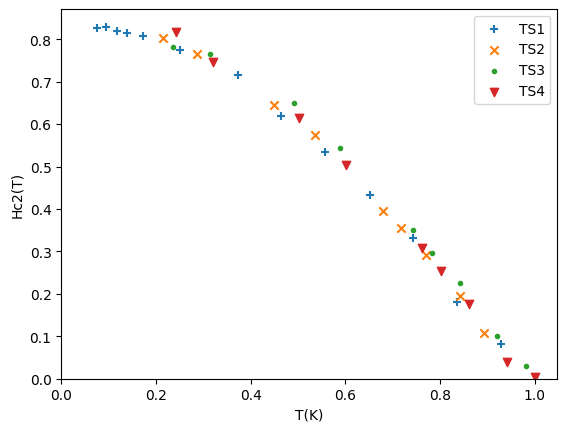

In [11]:
fig, ax = plt.subplots()

samples=['TS1', 'TS2', 'TS3', 'TS4']
sample_dfs=[fig5df[fig5df['sample']==sample] for sample in samples]
markers=['+','x','.','v']

axes_scatter=[ax.scatter(sample_df["T/Tc"].to_numpy(), sample_df["H/H_orb"].to_numpy(), label=sample, marker=marker) for sample_df, sample, marker in zip(sample_dfs, samples, markers)]

ax.set(xlabel='T(K)', ylabel='Hc2(T)')
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0)
ax.legend()
#plt.figtext(0.5, -0.05, "(fit/plot) h_c2_orb(0)(T)=5.1, T_c(K)=5.2795, slope=1.4", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

## Fit $\alpha$, $\lambda_{so}$ Ignore $H_{orb}$, $T_c$, $|dH_{c2}/dT|_{T_c}$ on Table S1
* slope $|dH_{c2}/dt|_{t=1}=1.4$
* H_orb $H_{orb}=5.1$
* t_c=5.279503105590062, from $H^{orb}_{c2}(0)=-0.69|dH_{c2}/dT|_{T_c}=-0.69T_c|dH_{c2}/dt|_{t=1}$

In [12]:
t=fig5df['T/Tc'].to_numpy()
field_norm=fig5df['H/H_orb'].to_numpy()
#slope=fig5df['s1_slope'].to_numpy()
slope=np.array([1.4]*len(t))

#field_orb=fig5df['s1_H_orb'].to_numpy()
field_orb=np.array([5.1]*len(t))

#t_c=fig5df['s1_T_c'].to_numpy()
t_c=np.array([5.279503105590062]*len(t))


ms=(t, t_c, slope, field_norm, field_orb)
#%%
xs0=[0.6, 0.1]
res_lsq=least_squares(whh.residual_exp, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), verbose=2)
#res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), gtol=None, ftol=1e-12, verbose=2)
print(f"res_lsq.x:{res_lsq.x}")

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.7883e-01                                    3.60e+01    
       1              2         4.4131e-02      6.35e-01       1.48e-01       2.09e+00    
       2              3         3.3053e-02      1.11e-02       1.20e-01       1.19e+00    
       3              4         3.2280e-02      7.73e-04       3.09e-03       4.15e-02    
       4              5         3.2036e-02      2.44e-04       3.29e-03       1.86e-02    
       5              6         3.2030e-02      5.73e-06       2.92e-04       1.62e-03    
       6              7         3.2030e-02      3.31e-07       2.88e-05       3.02e-05    
       7              8         3.2030e-02      1.34e-11       4.97e-07       1.40e-07    
`ftol` termination condition is satisfied.
Function evaluations 8, initial cost 6.7883e-01, final cost 3.2030e-02, first-order optimality 1.40e-07.
res_lsq.x:[6.68973405e-01 6.74522

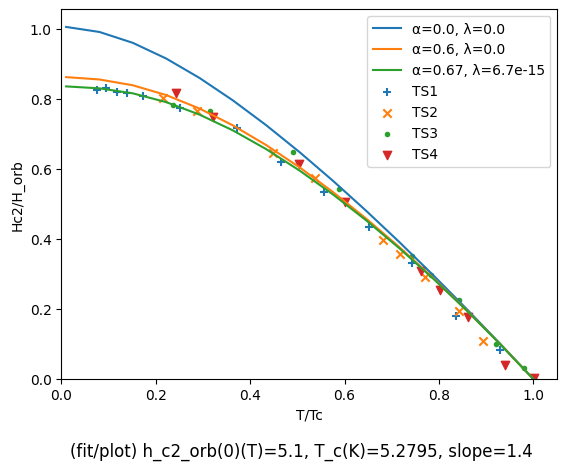

In [13]:
#%% plot from equation; y0=[0.6]
len_x=15
x=np.linspace(0.01, 1.0, len_x)

field_orb=5.1
y0=[0.6]
t_c=5.279503105590062

alpha=0.6
l_so=0.0
slope=1.4
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

alpha0_6lso0 = [least_squares(whh.residual_exp_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]
#alpha0_6lso0 = [least_squares(whh.residual, y0, args=inp.to_list(), bounds=(0.0, np.inf), gtol=None, ftol=1e-12).x for _, inp in plot_inps.iterrows()]

alpha=0.0
l_so=0.0
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

alpha0lso0 = [least_squares(whh.residual_exp_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]
#alpha0lso0 = [least_squares(whh.residual, y0, args=inp.to_list(), bounds=(0.0, np.inf), gtol=None, ftol=1e-12).x for _, inp in plot_inps.iterrows()]

alpha=res_lsq.x[0]
l_so=res_lsq.x[1]
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

fit_params = [least_squares(whh.residual_exp_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]
#fit_params = [least_squares(whh.residual, y0, args=inp.to_list(), bounds=(0.0, np.inf), gtol=None, ftol=1e-12).x for _, inp in plot_inps.iterrows()]

fig, ax = plt.subplots()
ax.plot(x, alpha0lso0, label="α=0.0, λ=0.0")
ax.plot(x, alpha0_6lso0, label="α=0.6, λ=0.0")
ax.plot(x, fit_params, label=f"α={res_lsq.x[0]:.02}, λ={res_lsq.x[1]:.02}")

samples=['TS1', 'TS2', 'TS3', 'TS4']
sample_dfs=[fig5df[fig5df['sample']==sample] for sample in samples]
markers=['+','x','.','v']

axes_scatter=[ax.scatter(sample_df["T/Tc"].to_numpy(), sample_df["H/H_orb"].to_numpy(), label=sample, marker=marker) for sample_df, sample, marker in zip(sample_dfs, samples, markers)]

ax.set(xlabel='T/Tc', ylabel='Hc2/H_orb')
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0)
ax.legend()
plt.figtext(0.5, -0.05, "(fit/plot) h_c2_orb(0)(T)=5.1, T_c(K)=5.2795, slope=1.4", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

## Fit $\alpha$, $\lambda_{so}$ using $H_{orb}$, $T_c$, $|dH_{c2}/dT|_{T_c}$ on Table S1

In [14]:
t=fig5df['T/Tc'].to_numpy()
field_norm=fig5df['H/H_orb'].to_numpy()
slope=fig5df['s1_slope'].to_numpy()
#slope=np.array([1.4]*len(t))

field_orb=fig5df['s1_H_orb'].to_numpy()
#field_orb=np.array([5.1]*len(t))

t_c=fig5df['s1_T_c'].to_numpy()
#t_c=np.array([5.279503105590062]*len(t))


ms=(t, t_c, slope, field_norm, field_orb)
#%%
xs0=[0.6, 0.1]
res_lsq=least_squares(whh.residual_exp, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), verbose=2)
#res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), gtol=None, ftol=1e-12, verbose=2)
print(f"res_lsq.x:{res_lsq.x}")

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.0264e-01                                    1.34e+01    
       1              2         9.7684e-02      2.05e-01       9.99e-02       1.50e+00    
       2              3         8.6092e-02      1.16e-02       1.04e-01       5.80e-02    
       3              4         8.0228e-02      5.86e-03       1.18e-01       3.01e-01    
       4              5         7.9884e-02      3.44e-04       2.70e-03       3.10e-02    
       5              6         7.9668e-02      2.16e-04       3.41e-03       1.30e-02    
       6              7         7.9658e-02      1.07e-05       4.51e-04       1.48e-03    
       7              8         7.9657e-02      5.83e-07       5.64e-05       3.32e-05    
       8              9         7.9657e-02      4.51e-11       1.20e-06       4.83e-06    
`ftol` termination condition is satisfied.
Function evaluations 9, initial cost 3.0264e-01

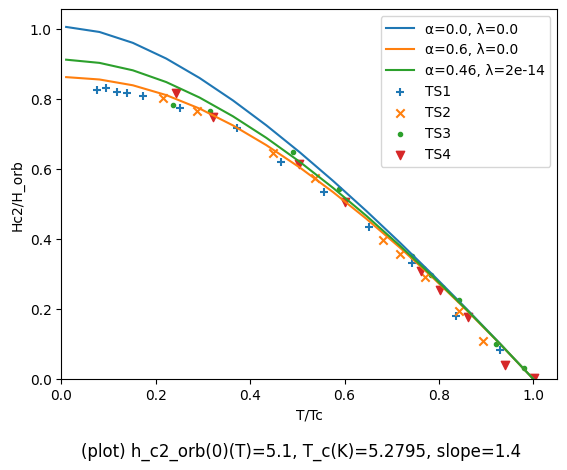

In [15]:
#%% plot from equation; y0=[0.6]
len_x=15
x=np.linspace(0.01, 1.0, len_x)

field_orb=5.1
y0=[0.6]
t_c=5.279503105590062

alpha=0.6
l_so=0.0
slope=1.4
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

alpha0_6lso0 = [least_squares(whh.residual_exp_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]
#alpha0_6lso0 = [least_squares(whh.residual, y0, args=inp.to_list(), bounds=(0.0, np.inf), gtol=None, ftol=1e-12).x for _, inp in plot_inps.iterrows()]

alpha=0.0
l_so=0.0
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

alpha0lso0 = [least_squares(whh.residual_exp_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]
#alpha0lso0 = [least_squares(whh.residual, y0, args=inp.to_list(), bounds=(0.0, np.inf), gtol=None, ftol=1e-12).x for _, inp in plot_inps.iterrows()]

alpha=res_lsq.x[0]
l_so=res_lsq.x[1]
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

fit_params = [least_squares(whh.residual_exp_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]
#fit_params = [least_squares(whh.residual, y0, args=inp.to_list(), bounds=(0.0, np.inf), gtol=None, ftol=1e-12).x for _, inp in plot_inps.iterrows()]

fig, ax = plt.subplots()
ax.plot(x, alpha0lso0, label="α=0.0, λ=0.0")
ax.plot(x, alpha0_6lso0, label="α=0.6, λ=0.0")
ax.plot(x, fit_params, label=f"α={res_lsq.x[0]:.02}, λ={res_lsq.x[1]:.02}")

samples=['TS1', 'TS2', 'TS3', 'TS4']
sample_dfs=[fig5df[fig5df['sample']==sample] for sample in samples]
markers=['+','x','.','v']

axes_scatter=[ax.scatter(sample_df["T/Tc"].to_numpy(), sample_df["H/H_orb"].to_numpy(), label=sample, marker=marker) for sample_df, sample, marker in zip(sample_dfs, samples, markers)]

ax.set(xlabel='T/Tc', ylabel='Hc2/H_orb')
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0)
ax.legend()
plt.figtext(0.5, -0.05, "(plot) h_c2_orb(0)(T)=5.1, T_c(K)=5.2795, slope=1.4", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()